In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("D:/HH/europe11.csv")

In [ ]:
df.head()

In [ ]:
# K-means --> Euclidean Distance --> sqrt(x2-x1)2+(y2-y1)2

In [ ]:
df.shape

In [ ]:
df1 = df.drop('Country', axis=1)

In [ ]:
# Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
s = StandardScaler()

In [ ]:
df2 = s.fit_transform(df1)

In [ ]:
df_scaled = preprocessing.scale(df1)

In [ ]:
clust = KMeans(n_clusters=4, random_state=8)

In [ ]:
clust1 = clust.fit(df_scaled)

In [ ]:
clustr = clust.fit_predict(df_scaled)

In [ ]:
df_new = df.copy()

In [ ]:
df_new['CLuster_num'] = clustr

In [ ]:
pd.value_counts(df_new['CLuster_num'])

In [ ]:
df_new[df_new['CLuster_num']==3]

In [ ]:
df_new.describe().T

In [ ]:
clustr.size

In [ ]:
clust1.inertia_

In [ ]:
df_new

In [ ]:
# Elbow Plot

In [ ]:
wss = []

for i in range(1,11):
    cluster = KMeans(n_clusters=i, random_state=8)
    cluster.fit(df_scaled)
    wss.append(cluster.inertia_)
    
plt.plot(range(1,11),wss)
plt.title("Elbow plot")
plt.xlabel("Num of Clusters")
plt.ylabel("Within Sum of Squares")
plt.show()

In [ ]:
grp = df_new.groupby("CLuster_num")

In [ ]:
grp.groups

In [ ]:
grp.size()

In [ ]:
grp.mean()

In [ ]:
grp.sum()

In [ ]:
df_new[df_new['CLuster_num']==1]

In [ ]:
clust1.cluster_centers_

In [ ]:
clust1.n_iter_

In [ ]:
clust1.labels_

In [ ]:
x.iloc[i,1]

In [ ]:
centers = pd.DataFrame(clust1.cluster_centers_, columns=df1.columns)
centroids = clust1.labels_
colors = ["g.","r.","b.","y."]

# Plot the clusters in a 2D

x = pd.DataFrame(df_scaled).iloc[:,0:1]
for i in range(len(df1)):
    plt.plot(x.iloc[i,0], x.iloc[i,1], colors[labels[i]], markersize=10)
    plt.show()

In [ ]:
# C Dist
# P Dist

In [ ]:
from scipy.spatial.distance import cdist, pdist

In [ ]:
a = [[1,4,40],[3,6,8]]

In [ ]:
arr = cdist(a,a)

In [ ]:
arr

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

In [ ]:
#Hierarchial Clustering
data_dist = pdist(df_scaled) # computing the distance

In [ ]:
data_dist

In [ ]:
data_link = linkage(data_dist, method='complete') # computing the linkage

In [ ]:
data_link

Text(0.5, 0.98, 'Clustering')

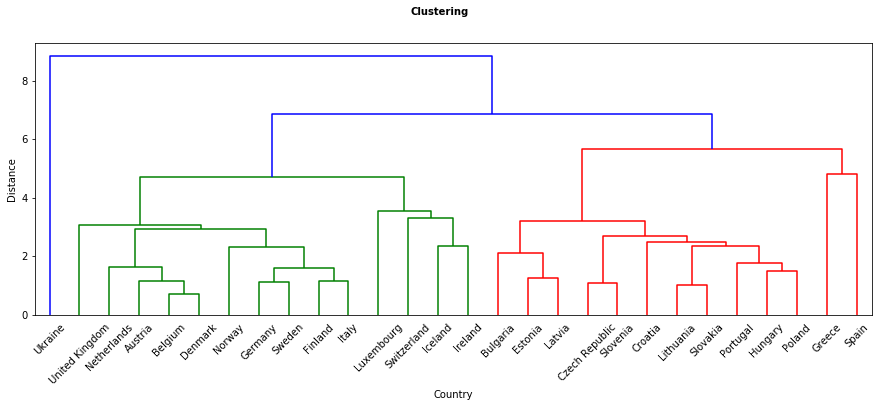

In [121]:
plt.figure(figsize=[15,5])
dendrogram(data_link, labels=list(df.Country))
plt.xlabel('Country')
plt.ylabel('Distance')
plt.suptitle('Clustering', fontweight='bold', fontsize=10)